In [1]:
#import necessary libraries
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# Read in the Complete Dataset
BlackFriday_Dataset = pd.read_csv('Documents/BlackFriday.csv')
BlackFriday_Dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:

# Get the Basic info of the dataset
BlackFriday_Dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
BlackFriday_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
num_rows = BlackFriday_Dataset.shape[0] #Provide the number of rows    in the dataset
num_cols = BlackFriday_Dataset.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 537577
Column number: 12


In [6]:
# After seeing all data above - Now need to do data wrangling - lets try to analyze and see what product got sold the 
# most

# Find missing values

BlackFriday_Dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
#Two columns hav3 missing values according to this. 
#Product_Cetegory_2 and Product_category_3 have maximum missing values - we can probably say not many buyers were interested
#in these. we can use 0 to fill these missing values in the next step. 

BlackFriday_Dataset.fillna(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [8]:
#Lets do One hot encoding which is another step of data preparation
# Lets do one hot encoding on Age, Gender, Cty 

le = LabelEncoder()
BlackFriday_Dataset['Gender_onehot_encode']              = le.fit_transform(BlackFriday_Dataset['Gender'].astype(str))
BlackFriday_Dataset['Age_onehot_encode']                 = le.fit_transform(BlackFriday_Dataset['Age'].astype(str))
BlackFriday_Dataset['City_Category_onehot_encode']       = le.fit_transform(BlackFriday_Dataset['City_Category'].astype(str))
BlackFriday_Dataset['Married_Category_onehot_encode']    = le.fit_transform(BlackFriday_Dataset['Marital_Status'].astype(str))



In [9]:
# Now using the data lets answer some questions
#1. Which users did maximum purchase ? List Top 30 spending users

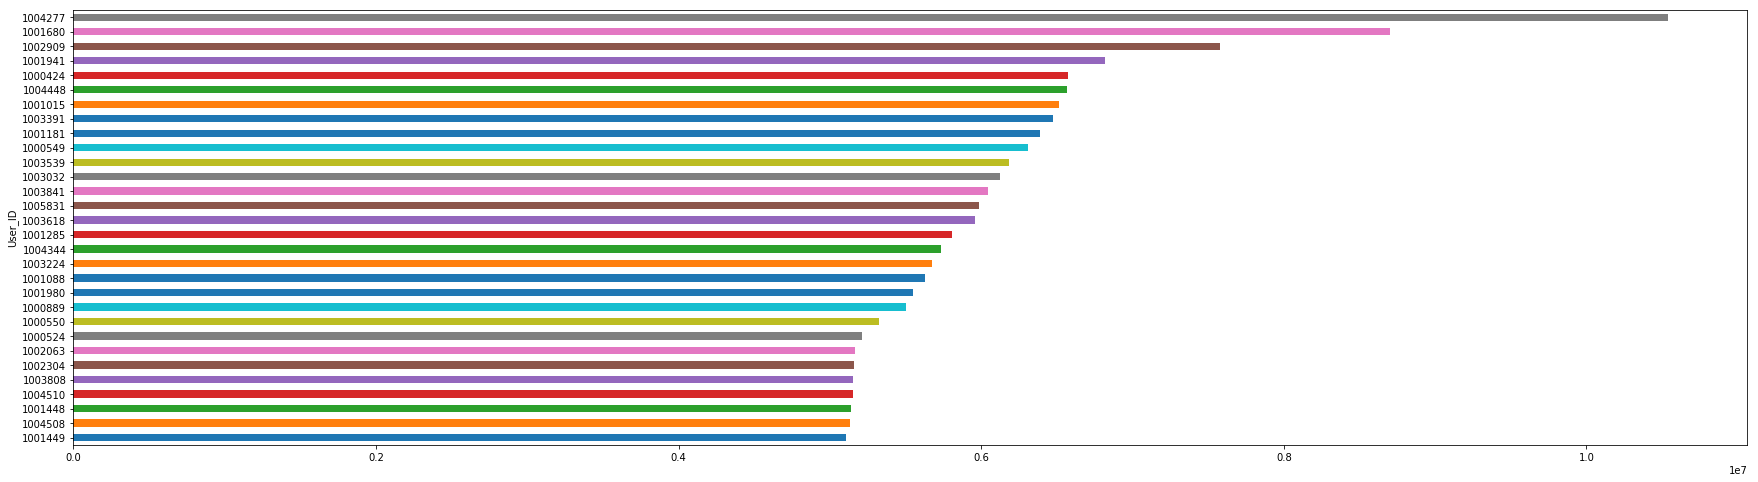

In [10]:
plt.figure(figsize = (30,8))
BlackFriday_Dataset.groupby('User_ID')['Purchase'].sum().nlargest(30).sort_values().plot('barh')


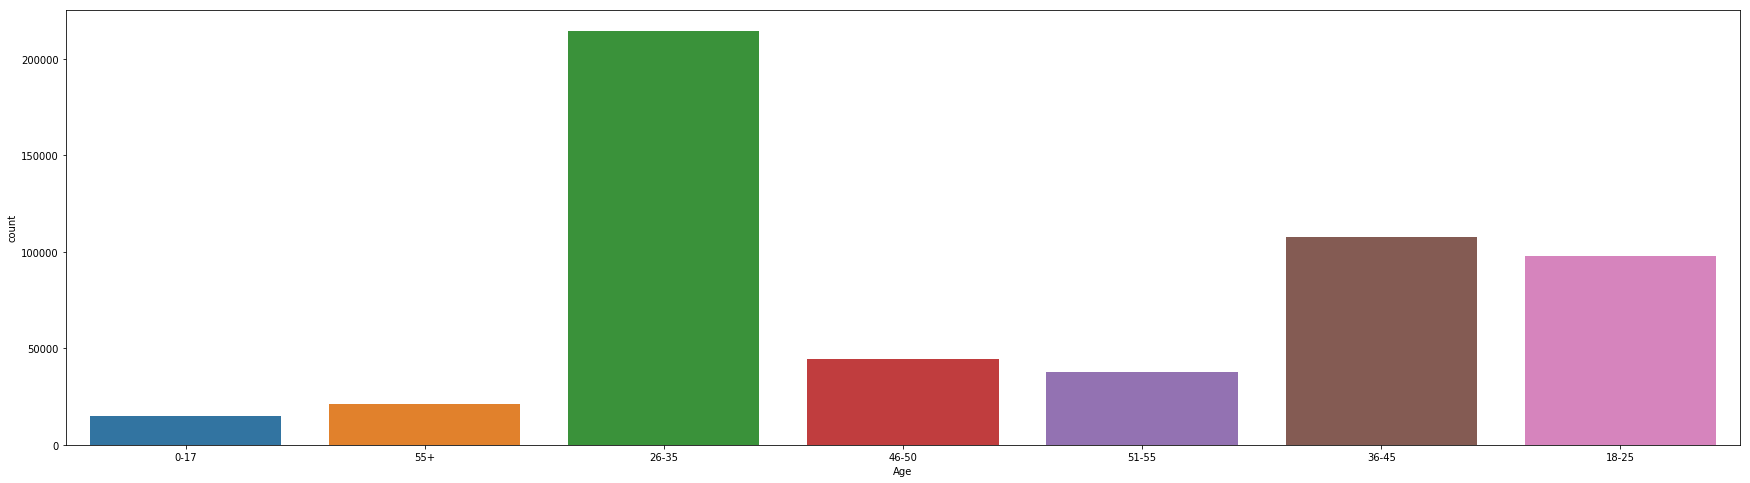

In [11]:
# Graph above says which user spent more 

#2. Now lets see if we can get the age group of the users who spent more ? 

plt.figure(figsize = (30,8))
sns.countplot(BlackFriday_Dataset['Age'])


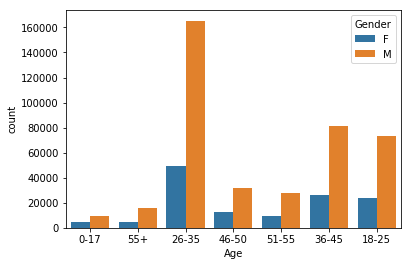

In [12]:
#above says age group of users who spent most. Can identify age groups of users who spent most - It appears like users between
#26 and 35 are first set who spends most followed by users between 36 and 45.

sns.countplot(BlackFriday_Dataset['Age'],hue=BlackFriday_Dataset['Gender'])

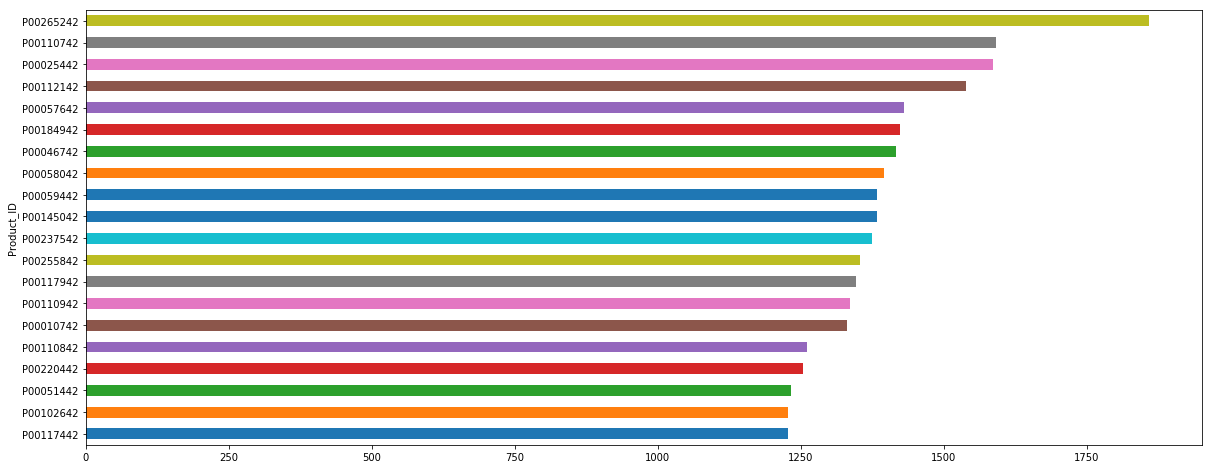

In [13]:
#Above added gender also to the chart - shows the gender of the users who spent the most. 

#Now we will see what products are most popular during the sales event
plt.figure(figsize = (20,8))
BlackFriday_Dataset.groupby('Product_ID')['Purchase'].count().nlargest(20).sort_values().plot('barh')


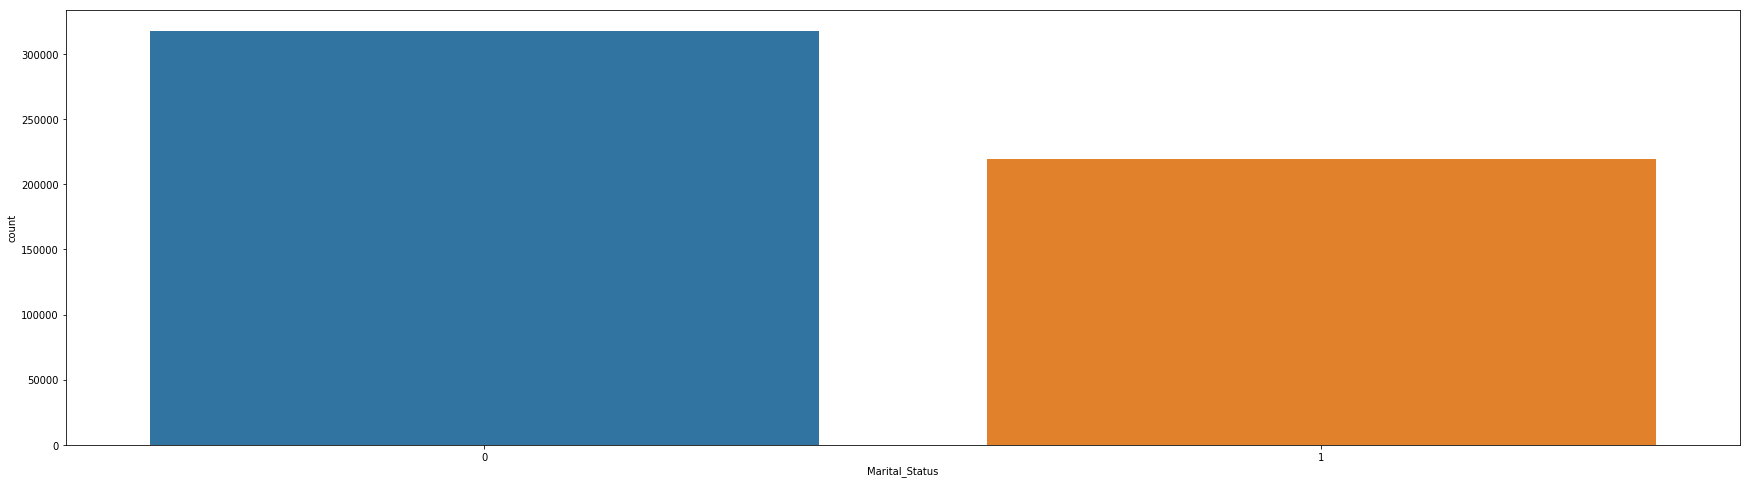

In [15]:
#I am curious to know if Married couple spent the most or unmarried couple spent the most.
#Interesting analysis and i believe the result is what I thought it is - Married couple spent less! 

plt.figure(figsize = (30,8))
sns.countplot(BlackFriday_Dataset['Marital_Status'])

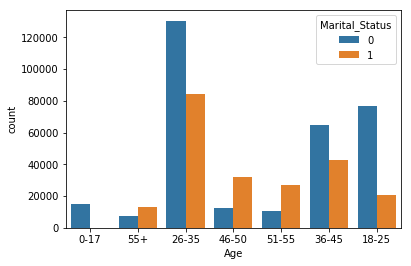

In [16]:

sns.countplot(BlackFriday_Dataset['Age'],hue=BlackFriday_Dataset['Marital_Status'])